In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [2]:
train_df = pd.read_csv("data/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("data/sign_mnist_test/sign_mnist_test.csv")

In [3]:
test = pd.read_csv("data/sign_mnist_test/sign_mnist_test.csv")
y = test['label']

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


<Axes: ylabel='count'>

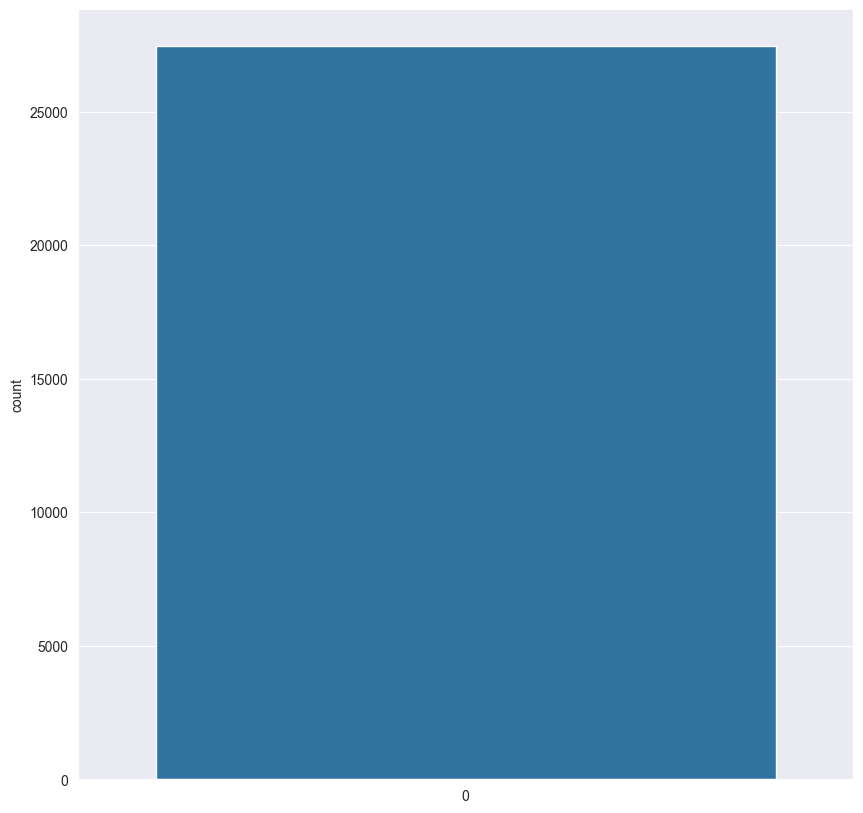

In [5]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_df.label)

In [6]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [7]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [8]:
x_train = train_df.values
x_test = test_df.values

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

C:\Users\sayed\AppData\Local\Temp\ipykernel_18860\2264534898.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


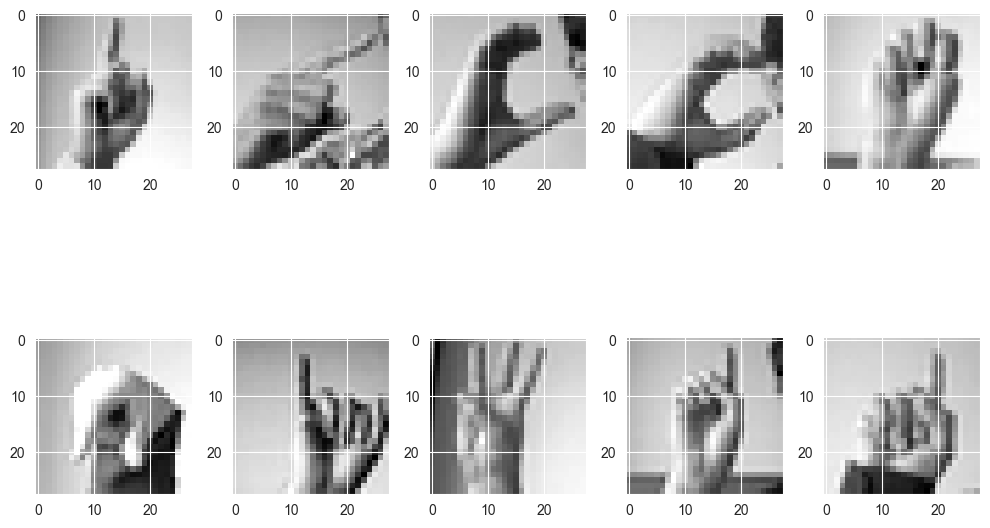

In [11]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

In [12]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 10, verbose=1, factor=0.5, min_lr=0.0000001)

In [14]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

In [15]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 100 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/100
215/215 [==============================] - 53s 233ms/step - loss: 1.0530 - accuracy: 0.6722 - val_loss: 4.1244 - val_accuracy: 0.1482 - lr: 0.0010
Epoch 2/100
215/215 [==============================] - 50s 234ms/step - loss: 0.2043 - accuracy: 0.9331 - val_loss: 1.1902 - val_accuracy: 0.5853 - lr: 0.0010
Epoch 3/100
215/215 [==============================] - 50s 233ms/step - loss: 0.1001 - accuracy: 0.9681 - val_loss: 0.1196 - val_accuracy: 0.9552 - lr: 0.0010
Epoch 4/100
215/215 [==============================] - 50s 232ms/step - loss: 0.0650 - accuracy: 0.9795 - val_loss: 0.0402 - val_accuracy: 0.9865 - lr: 0.0010
Epoch 5/100
215/215 [==============================] - 51s 235ms/step - loss: 0.0452 - accuracy: 0.9852 - val_loss: 0.0748 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 6/100
215/215 [==============================] - 51s 235ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0212 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 7/100
215/215 [=========================

Epoch 51/100
215/215 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9989
Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
215/215 [==============================] - 50s 232ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0057 - val_accuracy: 0.9974 - lr: 5.0000e-04
Epoch 52/100
215/215 [==============================] - 49s 229ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 2.6128e-04 - val_accuracy: 1.0000 - lr: 2.5000e-04
Epoch 53/100
215/215 [==============================] - 49s 228ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 1.0000 - lr: 2.5000e-04
Epoch 54/100
215/215 [==============================] - 49s 229ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 7.6492e-05 - val_accuracy: 1.0000 - lr: 2.5000e-04
Epoch 55/100
215/215 [==============================] - 50s 233ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 1.1917e-04 - val_accuracy: 1.0000 - lr: 2.5000e-04
Epoch 

215/215 [==============================] - 47s 219ms/step - loss: 1.7041e-04 - accuracy: 0.9999 - val_loss: 9.3884e-06 - val_accuracy: 1.0000 - lr: 1.5625e-05
Epoch 95/100
215/215 [==============================] - 48s 223ms/step - loss: 3.8671e-04 - accuracy: 0.9999 - val_loss: 8.4350e-06 - val_accuracy: 1.0000 - lr: 1.5625e-05
Epoch 96/100
215/215 [==============================] - 50s 234ms/step - loss: 1.7465e-04 - accuracy: 0.9999 - val_loss: 1.0207e-05 - val_accuracy: 1.0000 - lr: 1.5625e-05
Epoch 97/100
215/215 [==============================] - 50s 231ms/step - loss: 8.7956e-05 - accuracy: 1.0000 - val_loss: 9.6813e-06 - val_accuracy: 1.0000 - lr: 1.5625e-05
Epoch 98/100
215/215 [==============================] - 50s 234ms/step - loss: 1.4019e-04 - accuracy: 1.0000 - val_loss: 1.0923e-05 - val_accuracy: 1.0000 - lr: 1.5625e-05
Epoch 99/100
215/215 [==============================] - 50s 230ms/step - loss: 1.8071e-04 - accuracy: 0.9999 - val_loss: 1.2151e-05 - val_accuracy: 1.000

In [16]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 5s 20ms/step - loss: 9.4367e-06 - accuracy: 1.0000
Accuracy of the model is -  100.0 %


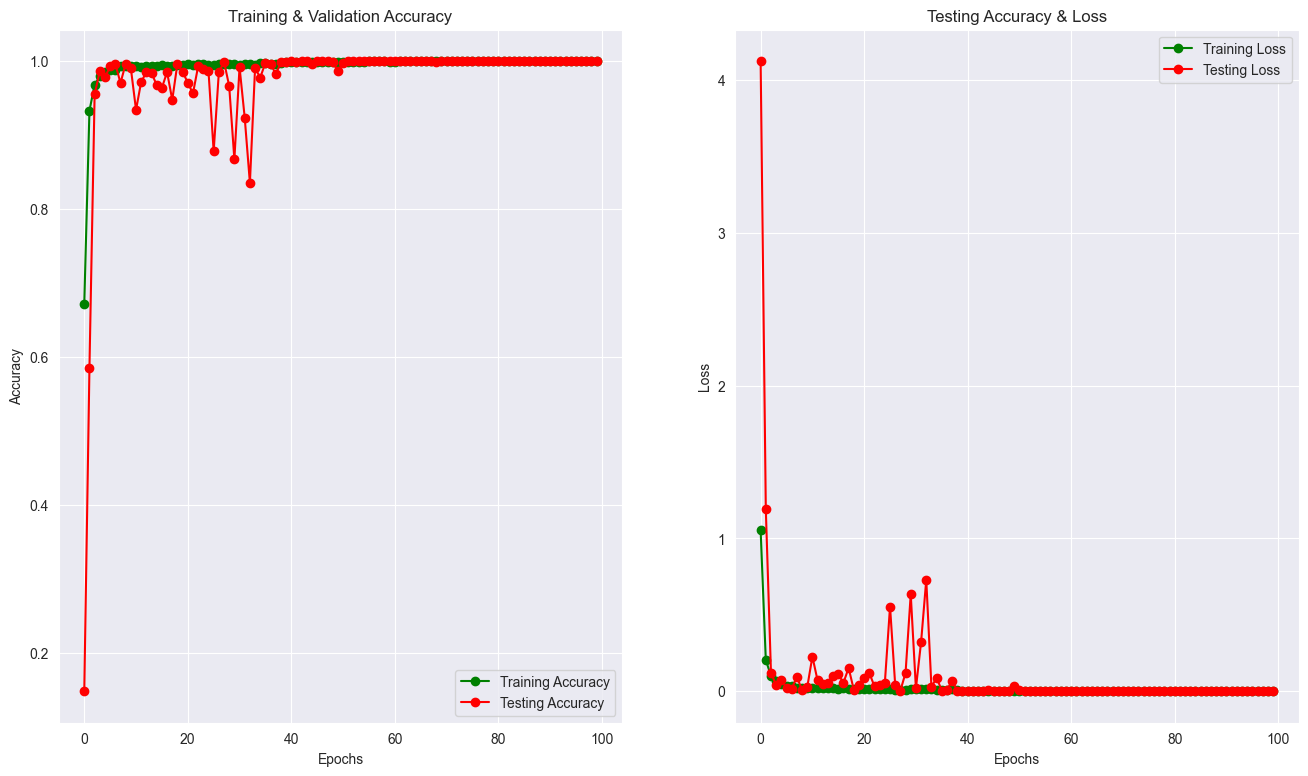

In [18]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [19]:
result = model.predict(x_test)
predictions = np.argmax(result, axis=1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]        

225/225 [==============================] - 5s 20ms/step


array([ 6,  5, 10,  0,  3], dtype=int64)

In [20]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

In [21]:
cm = confusion_matrix(y,predictions)

In [22]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

<Axes: >

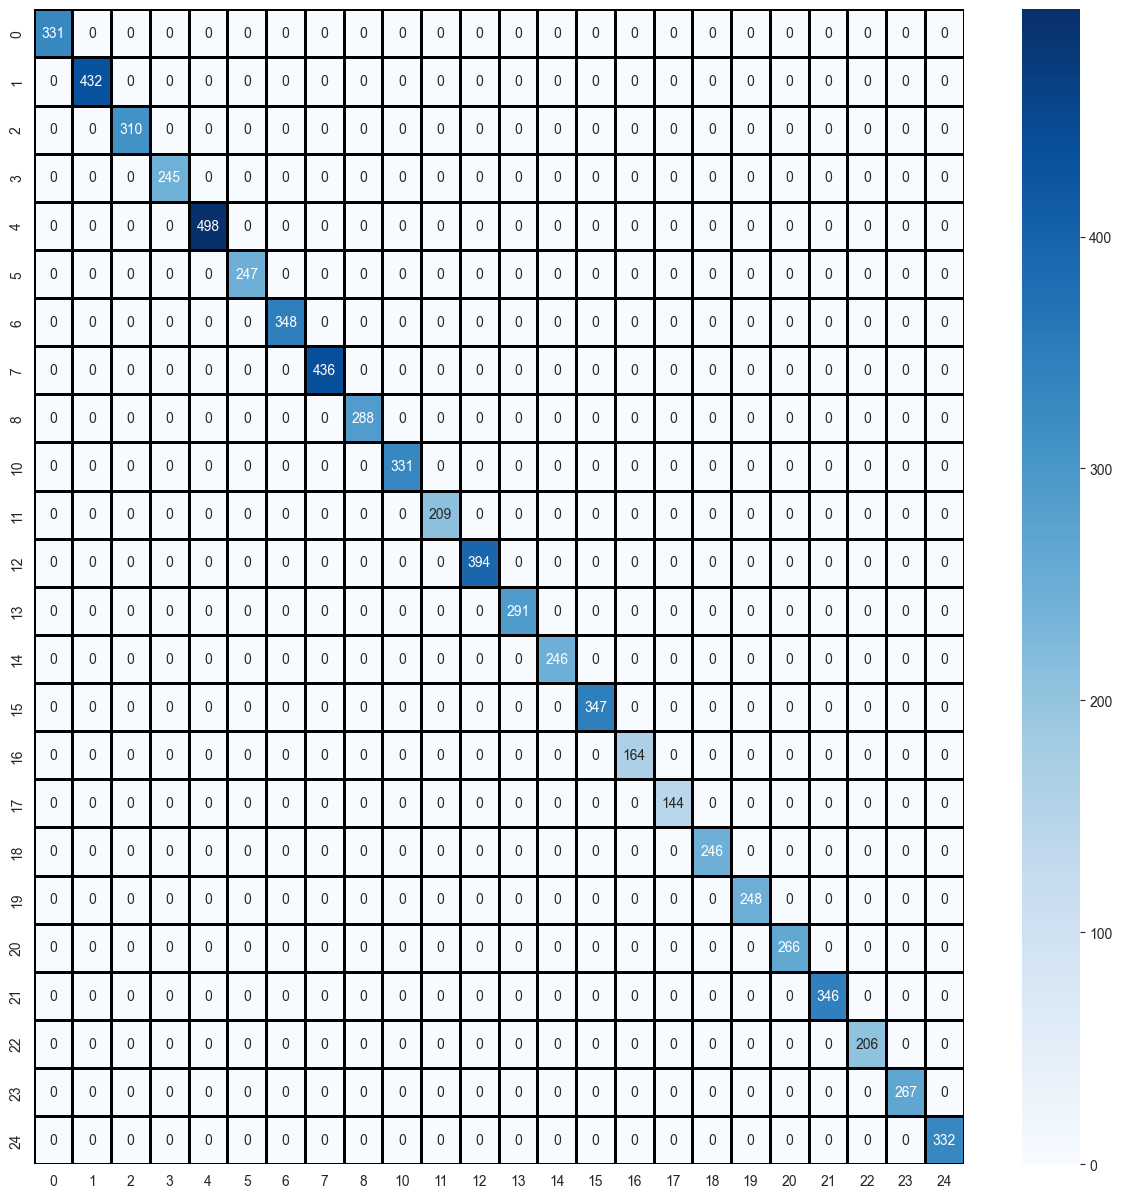

In [23]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [24]:
correct = np.nonzero(predictions == y)[0]

In [25]:
def getLetter(result):
    classLabels = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H',
                   8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O',
                  15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V',
                  22:'W', 23:'X', 24:'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

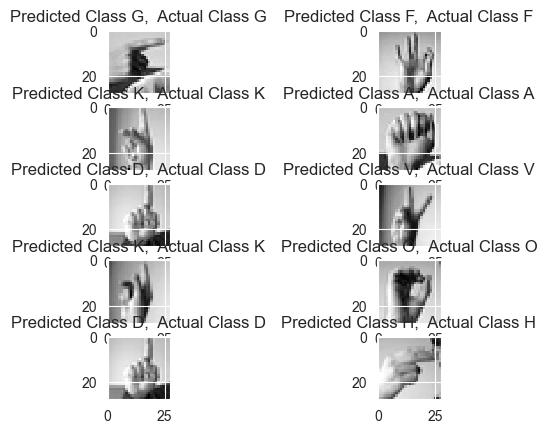

In [34]:
i = 0
for c in correct[:10]:
    plt.subplot(5,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},  Actual Class {}".format(getLetter(predictions[c]), getLetter(y[c])))
#     plt.tight_layout()
    i += 1

In [27]:
model.save('model/model1.keras') 

In [28]:
model = keras.models.load_model('model/model1.keras')